## ALEXNET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.6.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 1495 images belonging to 20 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 1495 images belonging to 20 classes.


In [5]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)
  
  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model

input_shape = 224, 224, 3
n_classes = 20

K.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()          

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0     

In [6]:
model_path = "ALEXNET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 100
batch_size = 64

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/100
23/23 [==============================] - 237s 10s/step - loss: 15.4441 - accuracy: 0.1018 - precision: 0.1107 - val_loss: 20.0569 - val_accuracy: 0.1019 - val_precision: 0.1025

Epoch 00001: accuracy improved from -inf to 0.10179, saving model to ALEXNET.h5
Epoch 2/100
23/23 [==============================] - 242s 10s/step - loss: 2.6923 - accuracy: 0.2118 - precision: 0.4416 - val_loss: 8.2053 - val_accuracy: 0.0625 - val_precision: 0.0633

Epoch 00002: accuracy improved from 0.10179 to 0.21183, saving model to ALEXNET.h5
Epoch 3/100
23/23 [==============================] - 239s 10s/step - loss: 2.6018 - accuracy: 0.2132 - precision: 0.3511 - val_loss: 3.0000 - val_accuracy: 0.0938 - val_precision: 0.2403

Epoch 00003: accuracy improved from 0.21183 to 0.21320, saving model to ALEXNET.h5
Epoch 4/100
23/23 [==============================] - 233s 10s/step - loss: 2.4273 - accuracy: 0.2636 - precision: 0.5412 - val_loss: 2.8519 - val_accuracy: 0.1386 - val_precision: 0.2391



23/23 [==============================] - 195s 8s/step - loss: 0.5855 - accuracy: 0.8274 - precision: 0.8531 - val_loss: 0.9856 - val_accuracy: 0.7649 - val_precision: 0.8102

Epoch 00065: accuracy did not improve from 0.84103
Epoch 66/100
23/23 [==============================] - 186s 8s/step - loss: 0.5598 - accuracy: 0.8342 - precision: 0.8772 - val_loss: 0.5671 - val_accuracy: 0.8465 - val_precision: 0.8683

Epoch 00066: accuracy did not improve from 0.84103
Epoch 67/100
23/23 [==============================] - 188s 8s/step - loss: 0.4876 - accuracy: 0.8465 - precision: 0.8817 - val_loss: 0.7861 - val_accuracy: 0.7894 - val_precision: 0.8262

Epoch 00067: accuracy improved from 0.84103 to 0.84647, saving model to ALEXNET.h5
Epoch 68/100
23/23 [==============================] - 173s 8s/step - loss: 0.4996 - accuracy: 0.8492 - precision: 0.8750 - val_loss: 0.4517 - val_accuracy: 0.8655 - val_precision: 0.8964

Epoch 00068: accuracy improved from 0.84647 to 0.84918, saving model to ALEX

Epoch 98/100
23/23 [==============================] - 92s 4s/step - loss: 0.2497 - accuracy: 0.9226 - precision: 0.9371 - val_loss: 0.3239 - val_accuracy: 0.8954 - val_precision: 0.9093

Epoch 00098: accuracy improved from 0.91984 to 0.92255, saving model to ALEXNET.h5
Epoch 99/100
23/23 [==============================] - 90s 4s/step - loss: 0.2738 - accuracy: 0.9171 - precision: 0.9354 - val_loss: 0.5259 - val_accuracy: 0.8356 - val_precision: 0.8600

Epoch 00099: accuracy did not improve from 0.92255
Epoch 100/100
23/23 [==============================] - 93s 4s/step - loss: 0.2977 - accuracy: 0.9147 - precision: 0.9330 - val_loss: 1.4727 - val_accuracy: 0.6984 - val_precision: 0.7182

Epoch 00100: accuracy did not improve from 0.92255


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

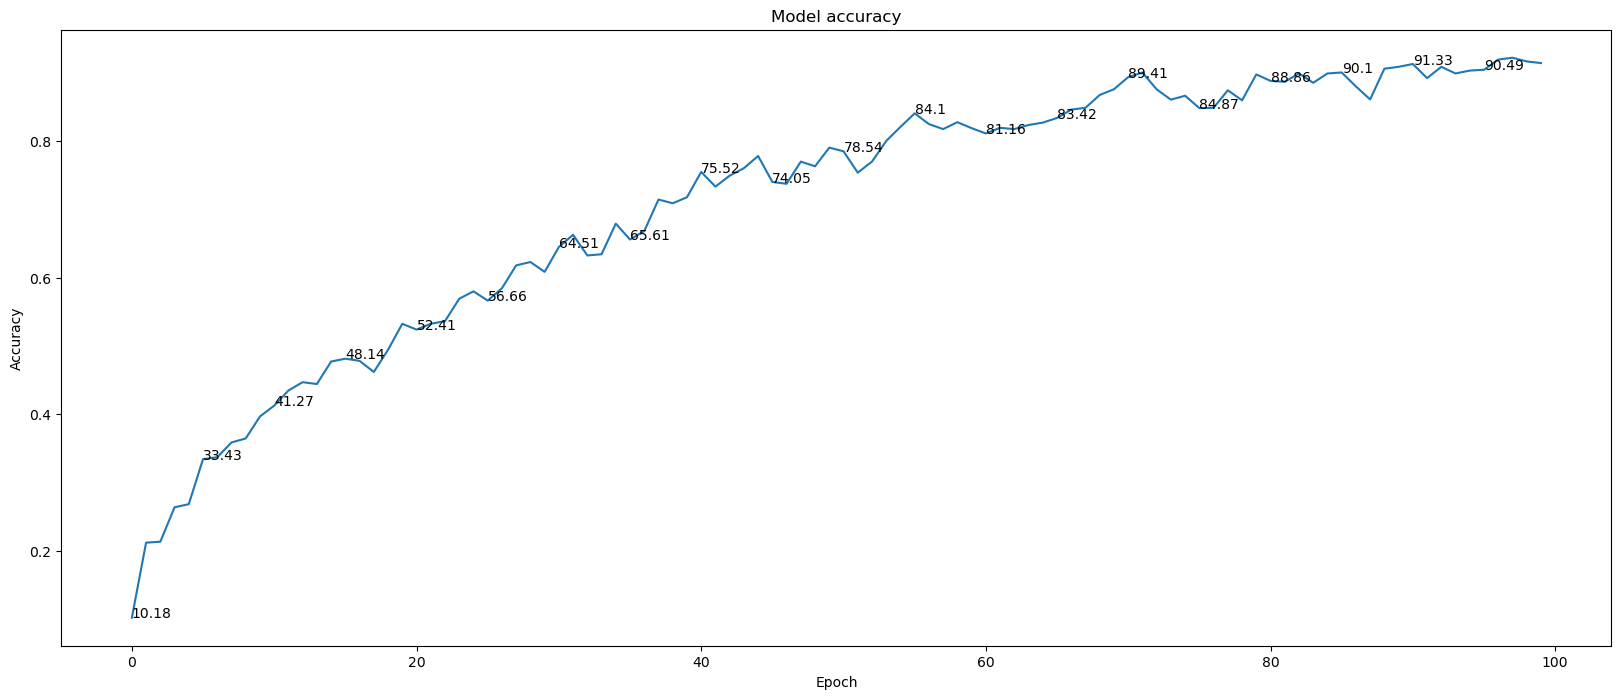

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

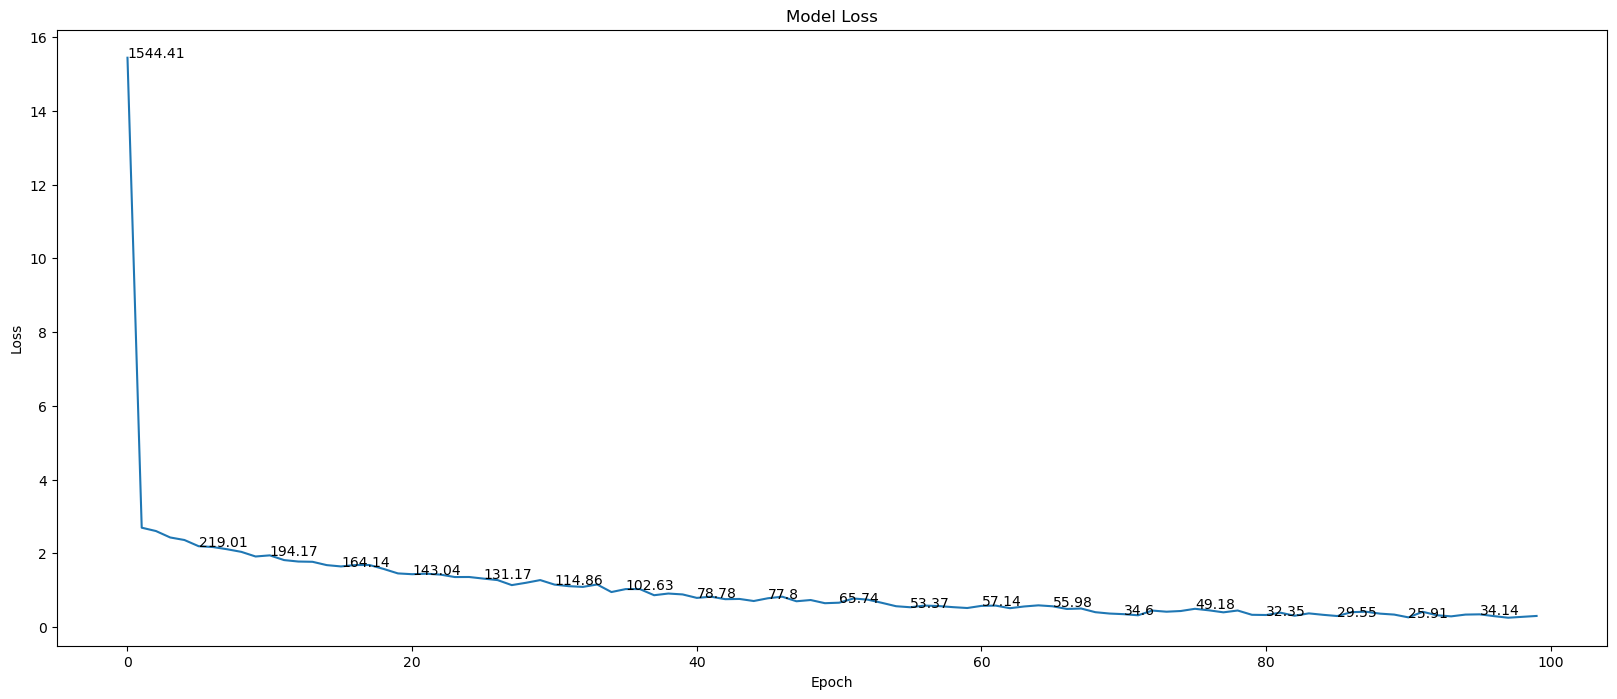

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()